# Cube and Data Warehouse mini Demo
This aims to implement a cube and do presentation
## Cube

In [1]:
#pip install "atoti[jupyterlab]"

In [2]:
#import os

#os.environ["ATOTI_LICENSE"] = "0hMD0SFPg7pb4lPLn0yHzNKhKpwYkf99rXv9rTIPK5UZKU23imzjxMsyn4HCoIeDtcmjQCRfLCuRpjniRuxPl3yPg6IjRWfJwoTco2/M8aIRd6C0Ltao5zKeqYLHcU+rvp7OuzsbUzrOM5AwlAA4277oaQghBMXORrTo1Tj4Z2WiAPGqkny+ksaCydF6HX19wU+YcWK2Cw20y2t9vWJRGN8WJX/NvD7/Rpl+FcteU33NTxvPDgNe5o4asAUxBF3i1GCMcpAz4swH9n5EdFumJKJmVpviG65NNpMlAuGlMAiU/hrVHHk3vVh4Pl+TUEFeji0jSrs5Ts5LsJfF78iu0A=="

#import atoti as tt
#session = tt.Session()


In [3]:
#session = tt.Session(
#    user_content_storage=".content",
#    port=5432,
#    java_options=["-Xms1G", "-Xmx10G"]
#)

In [4]:
#import psycopg2
#from psycopg2 import OperationalError


def create_connection(db_name, db_user, db_password, db_host, db_port):
    connection = None
    try:
        connection = psycopg2.connect(
            database=db_name,
            user=db_user,
            password=db_password,
            host=db_host,
            port=db_port,
        )
        print("Connection to PostgreSQL DB successful")
    except OperationalError as e:
        print(f"The error '{e}' occurred")
    return connection

In [5]:
# Connection details
#db_name = "Data Warehousing"
#db_user = "postgres"
#db_password = ""  # Update with your password
#db_host = "localhost"  # Update if your DB is hosted elsewhere
#db_port = "5432"

# Create the connection
#connection = create_connection(db_name, db_user, db_password, db_host, db_port)

In [6]:
#import pandas as pd 
#df = pd.read_csv("/kaggle/input/client-b/Data_olympics - country.csv")
#df1 = pd.read_csv("/kaggle/input/client-b/Data_olympics - mental_illness-2.csv")
#df2 = pd.read_csv("/kaggle/input/client-b/Data_olympics - Population.csv")
#df3 = pd.read_csv("/kaggle/input/client-b/Data_olympics - time.csv")


In [1]:
import atoti as tt
session = tt.Session()

Welcome to Atoti 0.8.11!

By using this community edition, you agree with the license available at https://docs.atoti.io/latest/eula.html.
Browse the official documentation at https://docs.atoti.io.
Join the community at https://www.atoti.io/register.

Atoti collects telemetry data, which is used to help understand how to improve the product.
If you don't wish to send usage data, you can request a trial license at https://www.atoti.io/evaluation-license-request.

You can hide this message by setting the `ATOTI_HIDE_EULA_MESSAGE` environment variable to True.


In [4]:
country_table = session.read_csv("/Users/syedumer/Downloads/clientB/Data/Country.csv", keys=["country_id"])
fact_table = session.read_csv("/Users/syedumer/Downloads/clientB/Data/Fact_table.csv", keys=["fact_id"])
population_table = session.read_csv("/Users/syedumer/Downloads/clientB/Data/Population.csv", keys=["population_id"])
year_table = session.read_csv("/Users/syedumer/Downloads/clientB/Data/Time.csv", keys=["year_id"])
medal_table = session.read_csv("/Users/syedumer/Downloads/clientB/Data/Medal.csv", keys=["medal_id"])



In [5]:
fact_table.join(country_table, fact_table["country_id"] == country_table["country_id"])

In [6]:
fact_table.join(population_table, fact_table["population_id"] == population_table["population_id"])

In [7]:
fact_table.join(year_table, fact_table["year_id"] == year_table["year_id"])

In [8]:
fact_table.join(medal_table, fact_table["medal_id"] == medal_table["medal_id"])

In [9]:
cube = session.create_cube(fact_table)

In [10]:
cube

In [11]:
m= cube.measures
m

{'contributors.COUNT': <atoti.measure.Measure object at 0x15268a3c0>, 'update.TIMESTAMP': <atoti.measure.Measure object at 0x1526998e0>, 'bipolar_disorder.SUM': <atoti.measure.Measure object at 0x152699970>, 'bipolar_disorder.MEAN': <atoti.measure.Measure object at 0x1526999a0>, 'eating_disorder.SUM': <atoti.measure.Measure object at 0x1526999d0>, 'eating_disorder.MEAN': <atoti.measure.Measure object at 0x152699a00>, 'anxiety_disorder.SUM': <atoti.measure.Measure object at 0x152699a30>, 'anxiety_disorder.MEAN': <atoti.measure.Measure object at 0x152699a60>, 'depressive_disorder.SUM': <atoti.measure.Measure object at 0x152699a90>, 'depressive_disorder.MEAN': <atoti.measure.Measure object at 0x152699ac0>, 'schizophrenia.SUM': <atoti.measure.Measure object at 0x152699af0>, 'schizophrenia.MEAN': <atoti.measure.Measure object at 0x152699b20>}

In [12]:
fact_table.head()

,country_id,population_id,medal_id,year_id,depressive_disorder,schizophrenia,bipolar_disorder,eating_disorder,anxiety_disorder
fact_id,,,,,,,,,
f1745,C106,P86,m2116,YR1994,589.9895,175.51175,109.45486,27.192335,202.3239
f1749,C106,P86,m2116,YR1998,600.715,173.9399,109.56272,25.684143,202.99767
f1753,C106,P86,m2116,YR2002,605.95416,173.98878,109.54987,25.931046,202.92613
f2590,C164,P136,m2404,YR1999,437.17606,181.59445,72.193634,19.164455,427.5774
f886,C58,P50,m4935,YR2005,656.81134,158.70302,157.26697,37.327915,378.59885


In [13]:
cube.query(m["depressive_disorder.SUM"])

,depressive_disorder.SUM
0,"2,530,581.19"


In [14]:
hierarchies, levels, measures = cube.hierarchies, cube.levels, cube.measures

In [15]:
# original hierarchies
hierarchies

{('Fact_table', 'country_id'): <atoti.hierarchy.Hierarchy object at 0x15269d160>, ('Medal', 'discipline_title'): <atoti.hierarchy.Hierarchy object at 0x15269d370>, ('Fact_table', 'medal_id'): <atoti.hierarchy.Hierarchy object at 0x15269d400>, ('Fact_table', 'fact_id'): <atoti.hierarchy.Hierarchy object at 0x15269d490>, ('Medal', 'country_medal'): <atoti.hierarchy.Hierarchy object at 0x15269d520>, ('Country', 'country_name'): <atoti.hierarchy.Hierarchy object at 0x15269d5b0>, ('Population', 'country_population'): <atoti.hierarchy.Hierarchy object at 0x15269d910>, ('Medal', 'event_gender'): <atoti.hierarchy.Hierarchy object at 0x15269d640>, ('Medal', 'city'): <atoti.hierarchy.Hierarchy object at 0x15269d700>, ('Fact_table', 'year_id'): <atoti.hierarchy.Hierarchy object at 0x15269d790>, ('Medal', 'medal_type'): <atoti.hierarchy.Hierarchy object at 0x15269d820>, ('Medal', 'participant_type'): <atoti.hierarchy.Hierarchy object at 0x15269d8b0>, ('Time', 'game_season'): <atoti.hierarchy.Hierarchy object at 0x15269d940>, ('Country', 'region'): <atoti.hierarchy.Hierarchy object at 0x15269dc70>, ('Fact_table', 'population_id'): <atoti.hierarchy.Hierarchy object at 0x15269bb00>}

In [16]:
# original levels
levels

In [17]:
measures

{'contributors.COUNT': <atoti.measure.Measure object at 0x152694440>, 'update.TIMESTAMP': <atoti.measure.Measure object at 0x1525fd6d0>, 'bipolar_disorder.SUM': <atoti.measure.Measure object at 0x1525fcfe0>, 'bipolar_disorder.MEAN': <atoti.measure.Measure object at 0x1525ffe00>, 'eating_disorder.SUM': <atoti.measure.Measure object at 0x15268c470>, 'eating_disorder.MEAN': <atoti.measure.Measure object at 0x15268c140>, 'anxiety_disorder.SUM': <atoti.measure.Measure object at 0x15268f8c0>, 'anxiety_disorder.MEAN': <atoti.measure.Measure object at 0x15268fe00>, 'depressive_disorder.SUM': <atoti.measure.Measure object at 0x15268cc20>, 'depressive_disorder.MEAN': <atoti.measure.Measure object at 0x15268cf50>, 'schizophrenia.SUM': <atoti.measure.Measure object at 0x15268d910>, 'schizophrenia.MEAN': <atoti.measure.Measure object at 0x15268da90>}

In [18]:
hierarchies['Country'] = [levels["country_name"], levels["region"]]

In [19]:
hierarchies["Population"] = [levels["country_population"],levels[('year_id')]]

In [20]:
hierarchies["Medal"] = [levels["country_medal"], levels[('city')],
                              levels[('discipline_title')], levels[('participant_type')], levels[('event_gender')]
                                , levels[('medal_type')]]

In [21]:
hierarchies["Time"] = [levels[('Population','year_id')],levels[('game_season')]]

#### Query 1: What's the axiety disorder count (Mental Illness) in the countries who won olympics medal?

In [34]:
cube.query(measures["anxiety_disorder.SUM"], levels=[levels[('Medal', 'country_medal')]])

,anxiety_disorder.SUM
country_medal,
Afghanistan,"13,270.43"
Algeria,"13,471.00"
Argentina,"14,451.68"
Armenia,"9,037.23"
Australia,"15,787.96"
...,...
Uzbekistan,"5,815.19"
Venezuela,"11,020.18"
Vietnam,"6,295.24"


Open the notebook in JupyterLab with the Atoti JupyterLab extension enabled to build this widget.
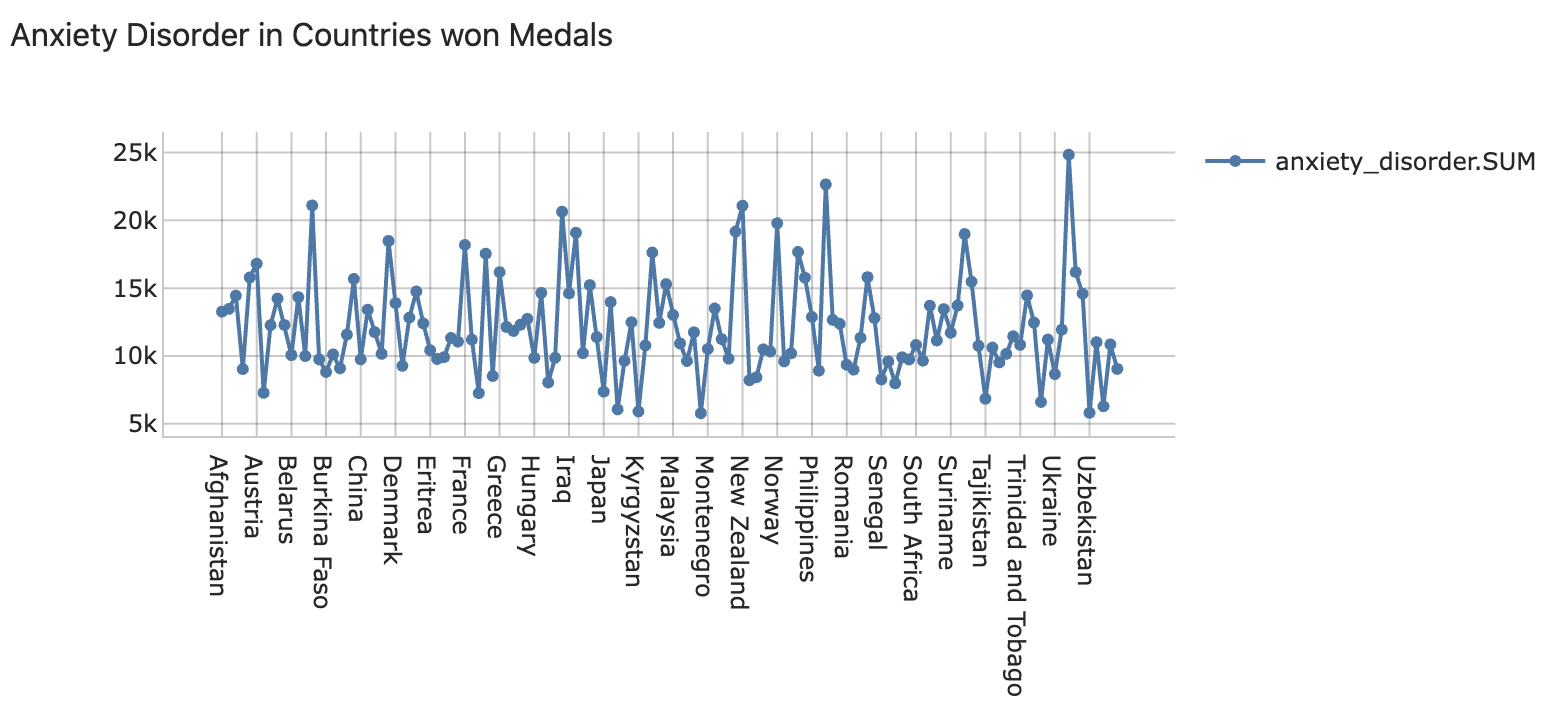

In [35]:
session.widget

#### Query 2: What's the depressive_disorder disorder count (Mental Illness) across Asia (region) and medal types (GOLD,SILVER,BRONZE) in Olympics?

In [124]:
cube.query(measures["depressive_disorder.SUM"],
           levels=[levels[('Medal', 'medal_type')], levels[('Country', 'region')]],
            filter=(
        (levels["Country", "region"] == "Asia")),
          )
        

,,,,,,,,depressive_disorder.SUM
country_medal,city,discipline_title,participant_type,event_gender,medal_type,country_name,region,
Afghanistan,beijing,Taekwondo,Athlete,Men,GOLD,Afghanistan,Asia,"26,740.93"
Armenia,tokyo,Artistic Gymnastics,Athlete,Women,SILVER,Armenia,Asia,"14,065.22"
Azerbaijan,athens,Boxing,Athlete,Women,SILVER,Azerbaijan,Asia,"13,023.73"
Bahrain,london,Athletics,Athlete,Men,SILVER,Bahrain,Asia,"26,868.76"
China,tokyo,3x3 Basketball,GameTeam,Men,SILVER,China,Asia,"13,387.69"
Georgia,sydney,Boxing,Athlete,Men,SILVER,Georgia,Asia,"16,547.39"
India,paris,Athletics,Athlete,Men,SILVER,India,Asia,"21,287.62"
Indonesia,seoul,Archery,GameTeam,Men,SILVER,Indonesia,Asia,"10,280.80"
Iran,london,Athletics,Athlete,Women,BRONZE,Iran,Asia,"25,581.95"


Open the notebook in JupyterLab with the Atoti JupyterLab extension enabled to build this widget.
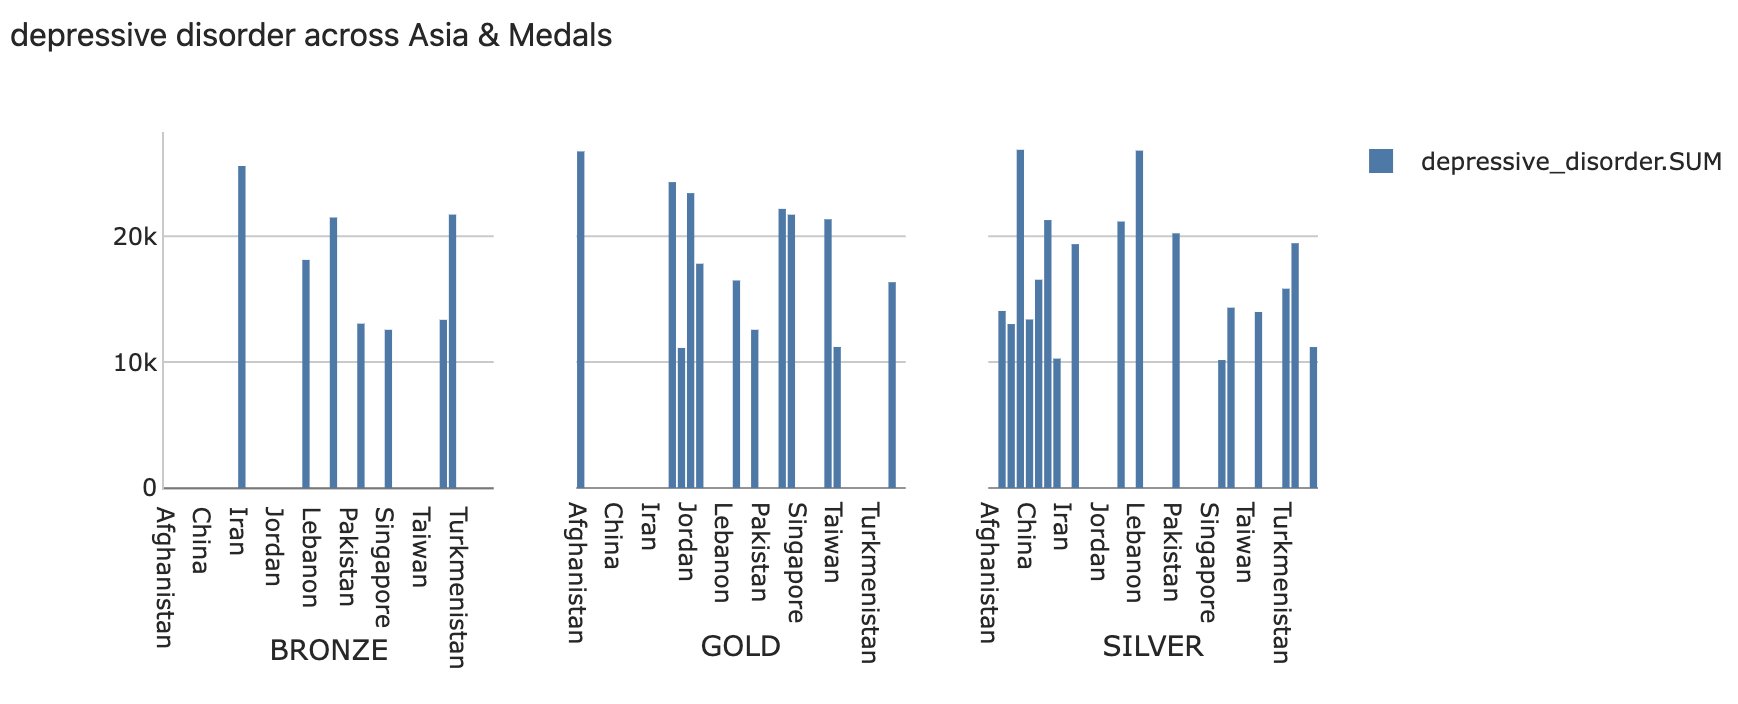

In [56]:
session.widget

#### Query 3: How much eating disorder factors has gain effect across different Countries Asia in the year 2019?

In [127]:
cube.query(measures["eating_disorder.SUM"],
           levels=[levels[('Country','country_name')],levels[('Time','year_id')] ], 
          filter=(
        (levels["Country", "region"] == "Asia") &
        (levels["Time", "year_id"] == "YR2019")),
)

          
        
    

,,eating_disorder.SUM
country_name,year_id,
Afghanistan,YR2019,24.71
Armenia,YR2019,27.13
Azerbaijan,YR2019,30.91
Bahrain,YR2019,61.88
China,YR2019,24.54
Georgia,YR2019,27.40
India,YR2019,27.50
Indonesia,YR2019,23.92
Iran,YR2019,53.94


Open the notebook in JupyterLab with the Atoti JupyterLab extension enabled to build this widget.
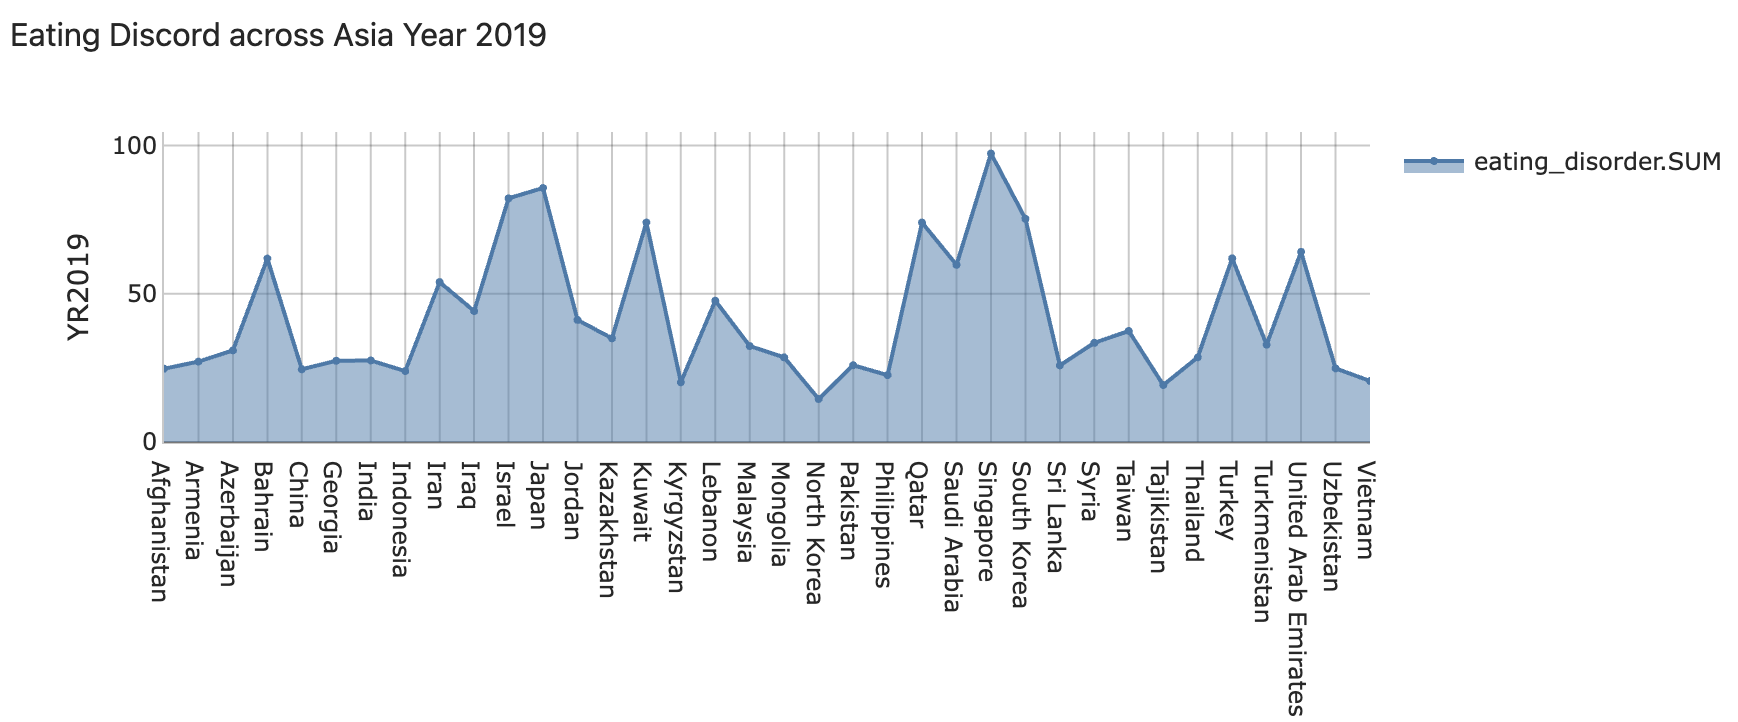

In [129]:
session.widget

#### Query 4: Bipolar disorder is Athletes who are males?

In [132]:
cube.query(measures["bipolar_disorder.SUM"] ,
           levels=[levels[('Medal', 'event_gender')],levels["Medal", "participant_type"]],
           filter=(
        (levels["Medal", "event_gender"] == "Men") &
        (levels["Medal", "participant_type"] == "Athlete")
           ),
          )

,,,,,bipolar_disorder.SUM
country_medal,city,discipline_title,participant_type,event_gender,
Afghanistan,beijing,Taekwondo,Athlete,Men,"4,421.03"
Australia,nagano,Alpine Skiing,Athlete,Men,"7,231.51"
Austria,albertville,Alpine Skiing,Athlete,Men,"5,806.26"
Bahamas,athens,Athletics,Athlete,Men,"5,856.59"
Bahrain,london,Athletics,Athlete,Men,"5,054.07"
...,...,...,...,...,...
United Arab Emirates,rome,Boxing,Athlete,Men,"4,854.45"
Uzbekistan,athens,Boxing,Athlete,Men,"3,325.73"
Venezuela,helsinki,Athletics,Athlete,Men,"5,400.99"


Open the notebook in JupyterLab with the Atoti JupyterLab extension enabled to build this widget.
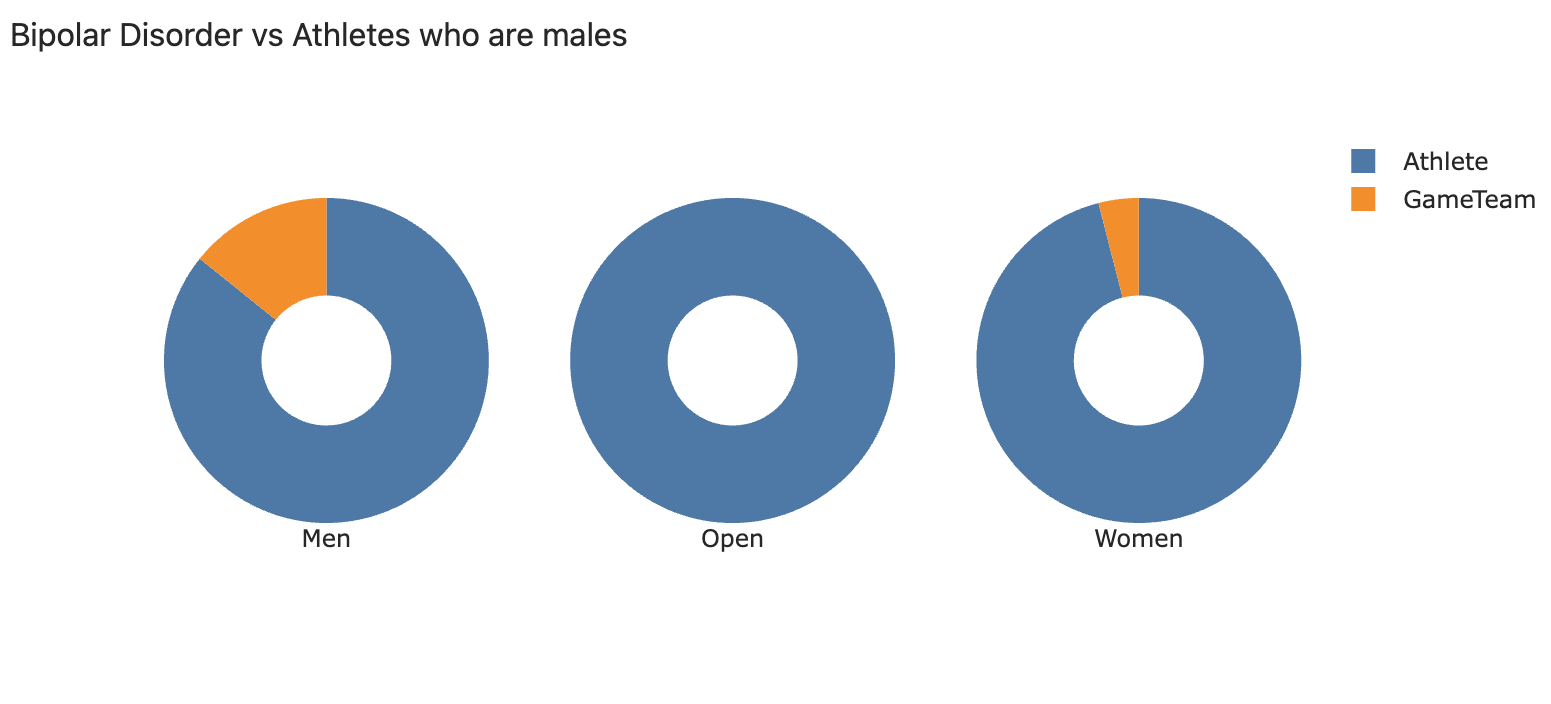

In [129]:
session.widget

#### Query 5: Identied the pattern in mental illness across winning asian countries since the start of Olympics

In [133]:
measures["eating_disorder across different countries over years"] = tt.filter(
    measures["eating_disorder.SUM"],  
    
    hierarchies["Time"].isin(["year_id"])  
)
measures["anxiety_disorder across different countries over years"] = tt.filter(
    measures["anxiety_disorder.SUM"], 
    hierarchies["Time"].isin(["year_id"])  
)
measures["schizophrenia across different countries over years"] = tt.filter(
  
    measures["schizophrenia.SUM"],  
   
    hierarchies["Time"].isin(["year_id"])  
)
measures["depressive_disorder across different countries over years"] = tt.filter(
   
    measures["depressive_disorder.SUM"],  
    hierarchies["Time"].isin(["year_id"])  
)
measures["bipolar_disorder across different countries over years"] = tt.filter(
   
    measures["bipolar_disorder.SUM"],  
    hierarchies["Time"].isin(["year_id"])  
)

In [143]:
cube.query(measures["bipolar_disorder.SUM"],measures["depressive_disorder.SUM"], measures["schizophrenia.SUM"],measures["anxiety_disorder.SUM"],    measures["eating_disorder.SUM"],
        levels=[levels[('Time','year_id')], 
        levels[('Country','region')], 
        levels[('Medal','medal_type')]],
        filter=(
        (levels["Country", "region"] == "Asia")&
        (levels["Medal","medal_type"] == "GOLD")),
          )
          

bipolar_disorder.SUM  \
year_id country_name region country_medal city            discipline_title    participant_type event_gender medal_type                        
YR1990  Afghanistan  Asia   Afghanistan   beijing         Taekwondo           Athlete          Men          GOLD                     147.64   
        Israel       Asia   Israel        tokyo           Artistic Gymnastics Athlete          Women        GOLD                     226.58   
        Japan        Asia   Japan         cortina ampezzo Alpine Skiing       Athlete          Women        GOLD                     140.99   
        Jordan       Asia   Jordan        tokyo           Karate              Athlete          Women        GOLD                     169.71   
        Kazakhstan   Asia   Kazakhstan    athens          Athletics           Athlete          Women        GOLD                     109.34   
...                                                                                                                                     ...   
YR2019  Qatar        Asia   Qatar         barcelona       Athletics           Athlete          Women        GOLD                     161.18   
        Saudi Arabia Asia   Saudi Arabia  sydney          Athletics           Athlete          Women        GOLD                     164.41   
        Syria        Asia   Syria         atlanta         Athletics           Athlete          Women        GOLD                     166.25   
        Taiwan       Asia   Taiwan        athens          Archery             GameTeam         Women        GOLD                      42.22   
        Uzbekistan   Asia   Uzbekistan    athens          Boxing              Athlete          Men          GOLD                     111.00   

                                                                                                                       depressive_disorder.SUM  \
year_id country_name region country_medal city            discipline_title    participant_type event_gender medal_type                           
YR1990  Afghanistan  Asia   Afghanistan   beijing         Taekwondo           Athlete          Men          GOLD                        895.23   
        Israel       Asia   Israel        tokyo           Artistic Gymnastics Athlete          Women        GOLD                        785.73   
        Japan        Asia   Japan         cortina ampezzo Alpine Skiing       Athlete          Women        GOLD                        356.73   
        Jordan       Asia   Jordan        tokyo           Karate              Athlete          Women        GOLD                        826.33   
        Kazakhstan   Asia   Kazakhstan    athens          Athletics           Athlete          Women        GOLD                        596.69   
...                                                                                                                                        ...   
YR2019  Qatar        Asia   Qatar         barcelona       Athletics           Athlete          Women        GOLD                        708.38   
        Saudi Arabia Asia   Saudi Arabia  sydney          Athletics           Athlete          Women        GOLD                        748.71   
        Syria        Asia   Syria         atlanta         Athletics           Athlete          Women        GOLD                        731.25   
        Taiwan       Asia   Taiwan        athens          Archery             GameTeam         Women        GOLD                        378.76   
        Uzbekistan   Asia   Uzbekistan    athens          Boxing              Athlete          Men          GOLD                        530.95   

                                                                                                                       schizophrenia.SUM  \
year_id country_name region country_medal city            discipline_title    participant_type event_gender medal_type                     
YR1990  Afghanistan  Asia   Afghanistan   beijing         Taekwondo           At

Open the notebook in JupyterLab with the Atoti JupyterLab extension enabled to build this widget.
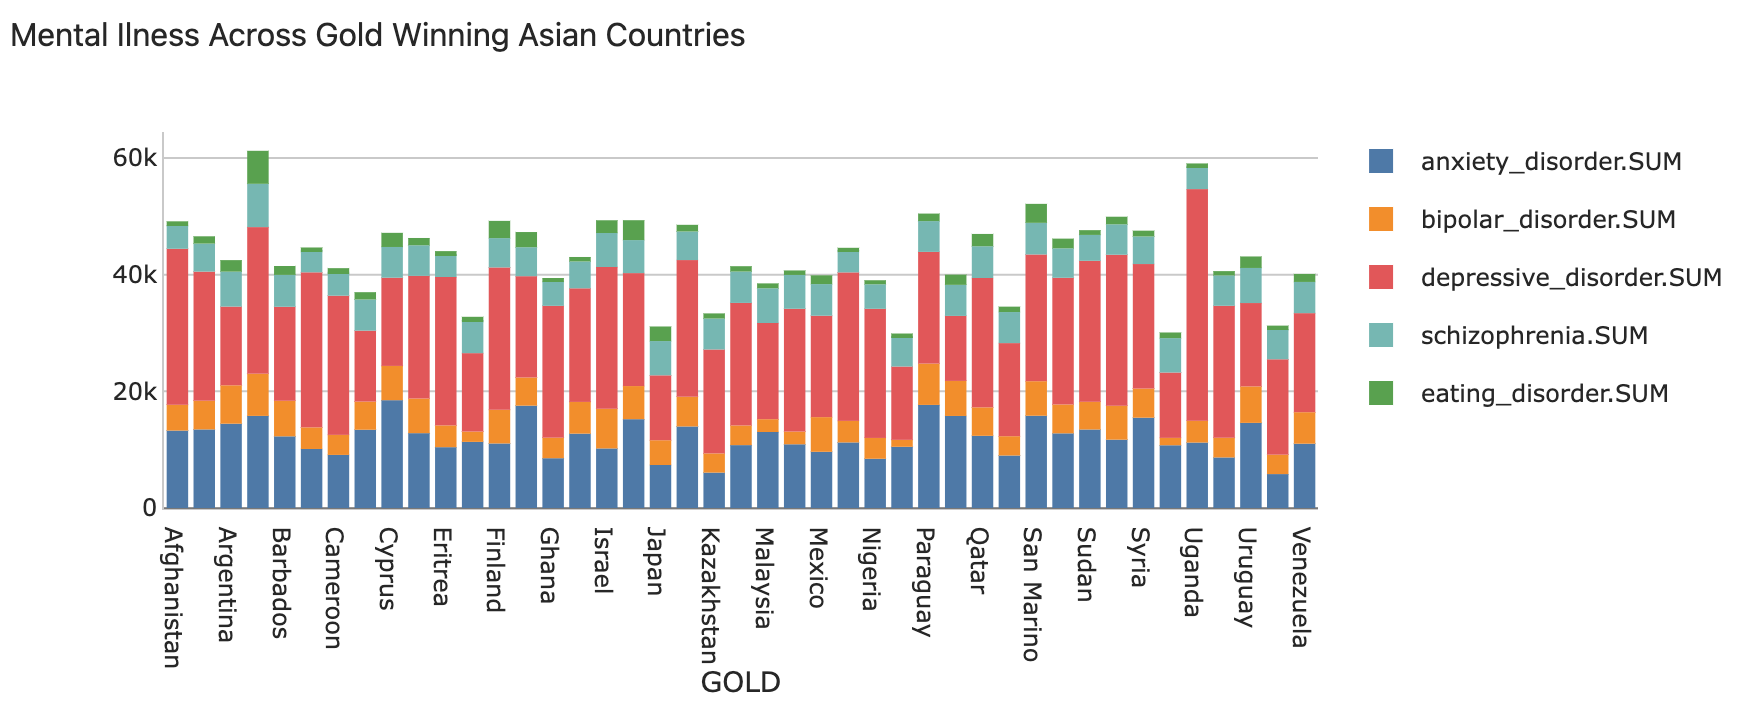

In [146]:
session.widget

## Presentation

In [136]:
session.link

http://localhost:65351

_Note_: This is the session's local URL: it may not be reachable if Atoti is running on another machine.